# Task1 -- Iris Flower Classification

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [6]:
iris = pd.read_csv('C:\\Users\\siddu\\OneDrive\\Documents\\oasis\\iris.zip')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# PRELIMINARY DATA INSPECTION

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])

In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [12]:
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [13]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
iris.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
0,25.5,5.006,3.418,1.464,0.244
1,75.5,5.936,2.770,4.260,1.326
2,125.5,6.588,2.974,5.552,2.026


# Preparing the test and train the data

In [15]:
 x = iris.drop(columns=['Species'],axis =1)
 y = iris['Species']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y,random_state = 1)

# Modelling and Predicting the data 

1. LogisticRegression

In [17]:
model = LogisticRegression()
model.fit(x_train,y_train)
x_test_prediction = model.predict(x_test)
tesing_data_accuracy = accuracy_score(x_test_prediction,y_test)
cm =metrics.confusion_matrix(x_test_prediction,y_test)
cm
accuracy = metrics.accuracy_score(x_test_prediction,y_test)
print("accuracy score by logistic regression :",accuracy)

accuracy score by logistic regression : 1.0


C:\Users\siddu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2.SVM

In [18]:
reg = SVC()
reg.fit(x_train,y_train)
test_prediction = reg.predict(x_test)
tesing_data_accuracy = accuracy_score(test_prediction,y_test)
print("accuracy by svm :",tesing_data_accuracy)

accuracy by svm : 1.0


# Visualising the iris

C:\Users\siddu\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: 'species'

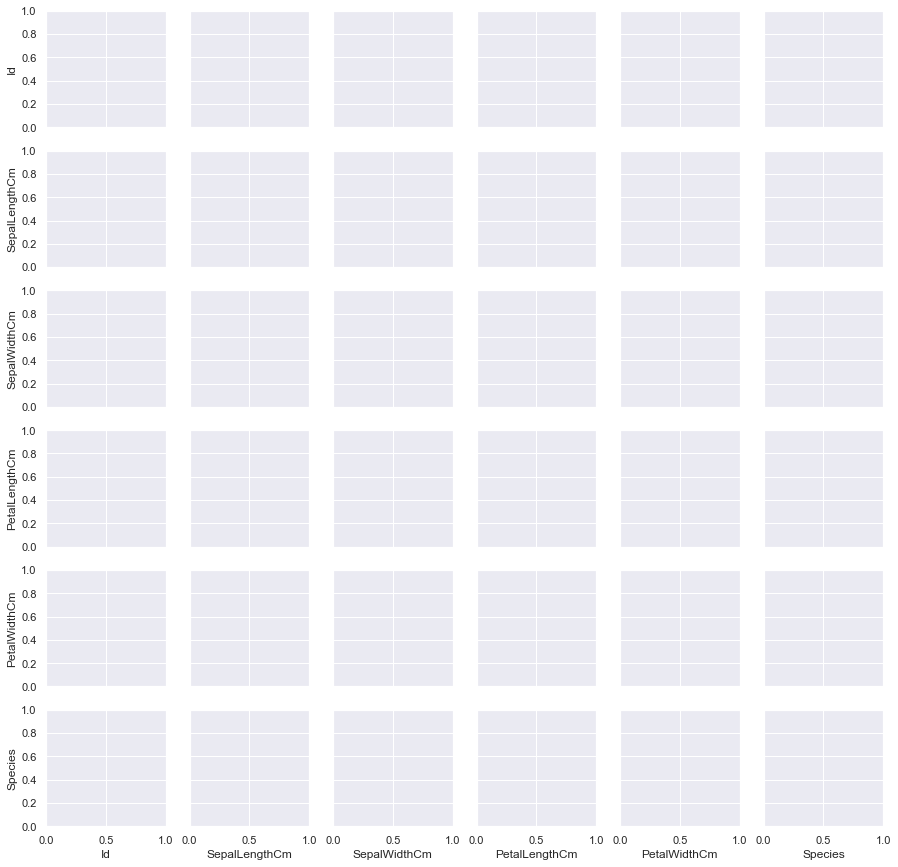

In [19]:
iris_bk = sns.load_dataset("iris")
sns.pairplot(iris,hue='species',size=2.5)
